Nama  :Ahmad Fadlih Wahyu Sardana

#Lab 1
Klasifikasi SVM dengan Data Dummy Linier

#Langkah 1 - Import Library


In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#Langkah 2 - Membuat Data Dummy

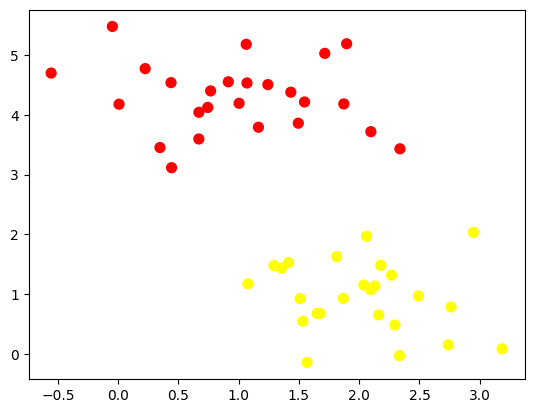

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#Langkah 3 - Buat Ilustrasi Garis Pemisah
Untuk membuat sebuah model klasifikasi, garis pemisah data dari dua buah himpunan yang terbentuk diperlukan. Namun, kondisi ini masih menyisakan kasus dimana garis pemisah yang dibutuhkan lebih dari satu garis.


Banyaknya garis pemisah menunjukkan bahwa muncul beberapa kemungkinan suatu data baru masuk dalam kategori tertentu. Sebuah data baru 'x' dimunculkan pada posisi yang berbeda dengan data pada dua himpunan lain sehingga data baru ini tidak masuk ke dalam kategori dua himpunan sebelumnya.

#Langkah 4 - Ilustrasi Margin

(-1.0, 3.5)

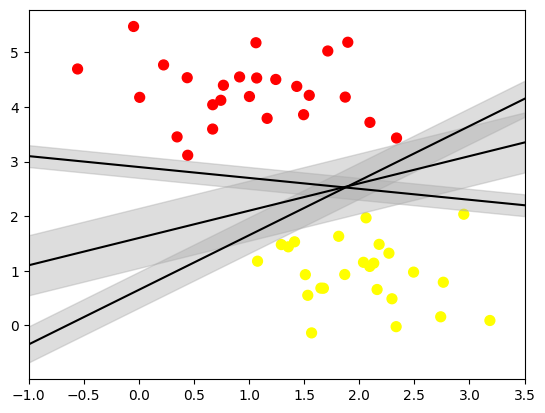

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

Margin yang digunakan pada SVM berfungsi untuk menunjukkan model yang paling optimal. Kriteria optimal ini diperoleh dari penentuan garis mana yang mampu memaksimalkan margin yang ada.

#Langkah 5 - Fitting Model

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

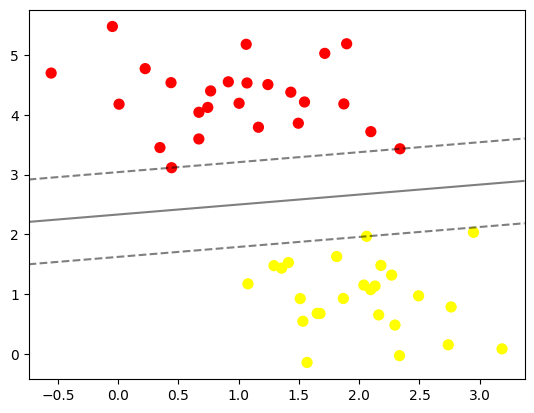

In [ ]:
#ploting
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

Hasil fitting merupakan kunci keberhasilan suatu classifier (yang hanya dilihat dari posisi dari support vector). Data-data lain yang berada jauh dari margin dan tetap berada di area yang tepat tidak memiliki kemampuan untuk memodifikasi fitting (karena bukan support vector). Data-data tersebut tidak berkontribusi terhadap loss function yang digunakan untuk fitting model. Untuk lebih memahami hal ini, 60 dan 120 data awal digunakan sebagai contoh dalam bentuk perbandingan.

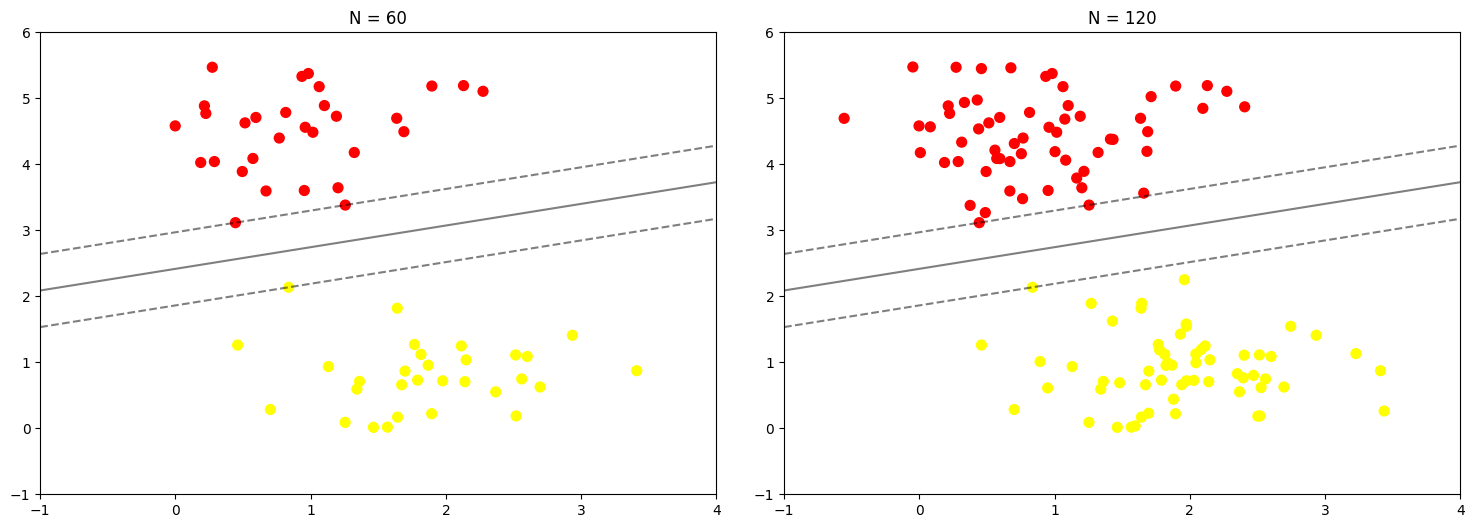

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.4 MB/s eta 0:00:00


#Lab 2
Klasifikasi SVM dengan Data Dummy Non-Linier

#Langkah 1 - Ilustrasi Data Non-Linier


#Langkah 1a - Import Library

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

#Langkah 1b - Buat Kembali Fungsi Plotting

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#Langkah 1c - Buat Data Dummy Non-Linier

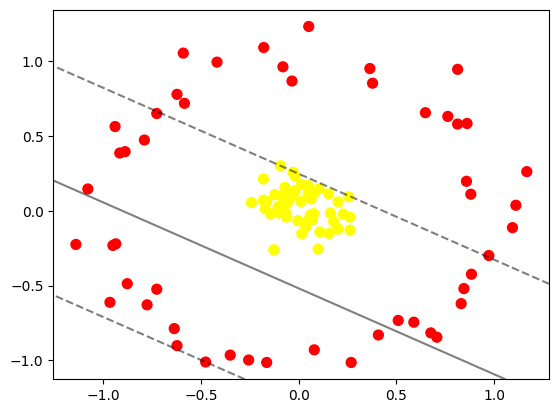

In [ ]:
# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Berdasarkan contoh data di atas, tidak ditemukan sebuah garis pemisah linier yang mampu berperan sebagai pemisah data. Oleh karena itu, proyeksi (sudut pandang) lain terhadap data diperlukan supaya data dapat terpisahkan dengan jelas. Pada kegiatan ini, proyeksi yang digunakan adalah proyeksi berbasis radial.

r
=n
p
.
e
x
p
(
−
(
X
∗
∗
2
)
.
s
u
m
(
1
)
)
r=np.exp(−(X∗∗2).sum(1))

Karena proyeksi radial tidak cukup menggunakan model 2D, maka plot visualisasi diubah menjadi model 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.97278377, -0.29924103],
       [ 0.05355196, -0.05694247],
       [ 0.09954124, -0.25598384],
       [-0.63668288, -0.78735438],
       [-0.1788304 ,  1.09092676],
       [ 1.16720354,  0.26139684],
       [ 0.36418024,  0.95049048],
       [ 0.06259767,  0.07781063],
       [ 0.0446937 , -0.0729534 ],
       [-0.06249972, -0.04226643],
       [-0.17057922,  0.01154425],
       [-0.01920487,  0.13461964],
       [ 0.26180863, -0.04252903],
       [-0.18072409,  0.07015058],
       [-0.16434661,  0.06209423],
       [-0.00453339, -0.06612938],
       [ 0.07745021, -0.01983164],
       [ 0.04761484,  0.12026181],
       [ 0.88396511, -0.42415274],
       [-0.24173909,  0.05420946],
       [ 0.70704846, -0.84502189],
       [-0.59054248,  1.0537126 ],
       [-0.04337335,  0.09641162],
       [ 0.37795192,  0.85248407],
       [-0.35034575, -0.96479428],
       [ 0.83130026, -0.62067617],
       [ 0.85848182,  0.1968266 ],
       [-0.06697639, -0.01326919],
       [-0.58465295,  0.71802916],
       [-0.10554273,  0.02597259],
       [-0.09670997, -0.00874866],
       [-1.07886142,  0.14567184],
       [-0.77583762, -0.62869549],
       [-0.41793569,  0.99329647],
       [-0.78965982,  0.47270849],
       [-0.07056722,  0.15625175],
       [ 0.05135665,  1.23163137],
       [ 0.04797531,  0.16770924],
       [ 0.17902835, -0.07207728],
       [-0.93958982,  0.56274397],
       [ 0.16221969, -0.01502045],
       [-0.02901777,  0.2575112 ],
       [-0.08073405,  0.96212906],
       [ 0.01214785,  0.06162319],
       [ 0.03658045, -0.10810956],
       [-0.01868667,  0.23360717],
       [ 1.11121899,  0.03683047],
       [-0.7262449 ,  0.65006821],
       [-1.14005895, -0.22517418],
       [-0.62276803, -0.90133977],
       [ 0.86138387,  0.58334939],
       [-0.12225071,  0.10802698],
       [-0.18086492,  0.21214043],
       [ 0.1534462 ,  0.11266429],
       [-0.93596907, -0.22109267],
       [-0.05779847,  0.05486538],
       [-0.88823772,  0.39498557],
       [-0.12732714, -0.26095805],
       [-0.96572168, -0.61207208],
       [ 0.05989333, -0.02828868],
       [ 0.07833049,  0.11681283],
       [ 0.20102362,  0.05880272],
       [ 0.64845109,  0.65527467],
       [-0.47602268, -1.01097196],
       [ 0.10427663,  0.14726448],
       [-0.14391885, -0.02046891],
       [-0.03429603,  0.86699685],
       [ 0.01448413,  0.17712569],
       [-0.16367948, -1.01400578],
       [ 0.01592731, -0.15290965],
       [ 0.20169583, -0.12271796],
       [ 0.26326465, -0.12935894],
       [-0.2560579 , -0.99750306],
       [ 0.06774145, -0.06150387],
       [ 0.25596527,  0.09327217],
       [-0.10449263, -0.01514216],
       [ 0.10840712, -0.1413944 ],
       [-0.08563653,  0.09467319],
       [ 0.22828132, -0.02157105],
       [ 0.81316108,  0.57940841],
       [ 0.81325551,  0.94511586],
       [ 1.09382299, -0.11298127],
       [ 0.67605497, -0.81602744],
       [ 0.50931424, -0.73288628],
       [-0.95068573, -0.231643  ],
       [ 0.76308203,  0.63047385],
       [-0.0933917 ,  0.30078997],
       [-0.72621197, -0.5242629 ],
       [ 0.88076878,  0.11058049],
       [-0.62262629,  0.77806438],
       [ 0.84538787, -0.5201706 ],
       [-0.03141945,  0.1014109 ],
       [ 0.26850152, -1.01392902],
       [ 0.07967299, -0.92958981],
       [ 0.40782771, -0.83030214],
       [ 0.15575163, -0.15205501],
       [-0.91546857,  0.38586419],
       [-0.87727921, -0.48744338],
       [-0.08332487, -0.00492182],
       [ 0.58914745, -0.74483331]]), y=array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0]))>

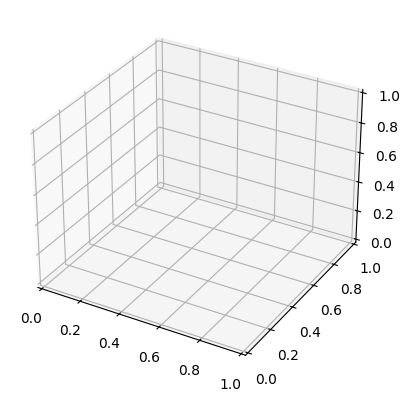

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

#Langkah 2 - Fitting Model

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

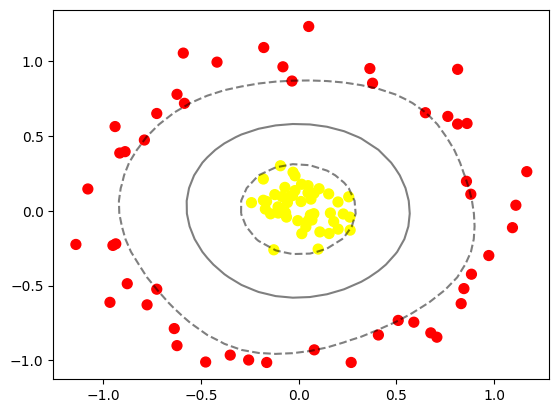

In [ ]:
#plot hasil decision
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

#Lab 3
SVM Data Overlapping

#Langkah 1 - Import Library dan Buat Fungsi Plotting

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#Langkah 2 - Buat Data Dummy

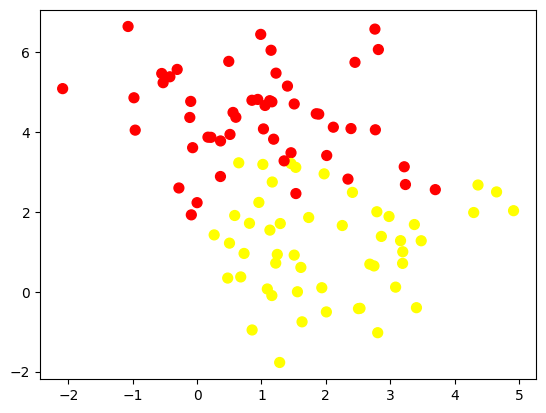

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

#Langkah 3 - Analisis Dampak Tunning

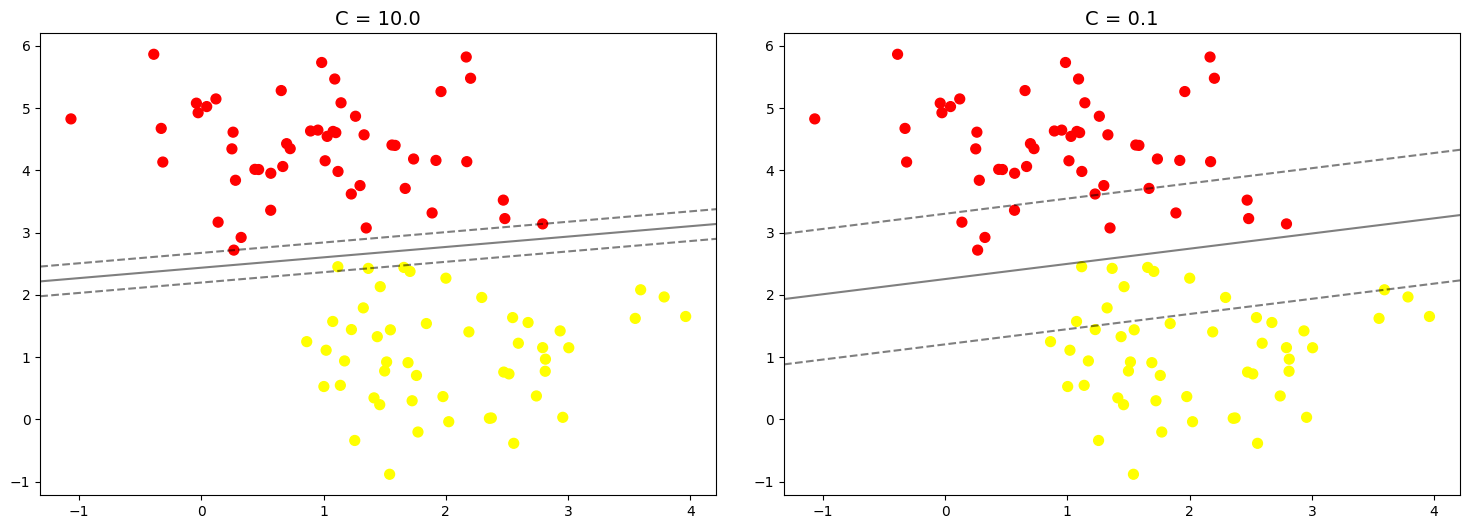

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#Lab 4
Klasifikasi Citra Wajah

#Langkah 0 - Unduh Dataset

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


#Langkah 1 - Inspeksi Citra Wajah

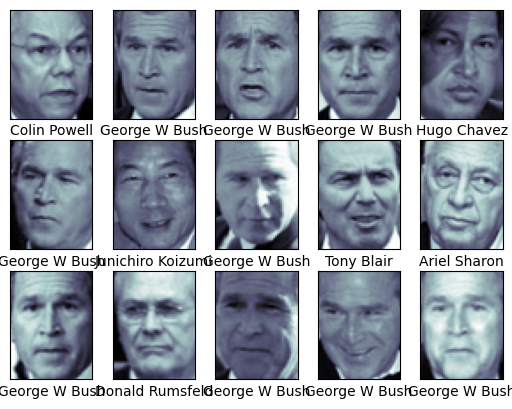

In [ ]:
# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

#Langkah 2 - Pra Pengolahan Data

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)

#Langkah 3 - Split Data

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

#Langkah 4 - Pembuatan Model + Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 2min 12s, sys: 222 ms, total: 2min 12s
Wall time: 1min 24s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
#Gunakan model terbaik tersebut untuk proses prediksi.
model = grid.best_estimator_
yfit = model.predict(Xtest)

#Langkah 5 - Cek Hasil Prediksi

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

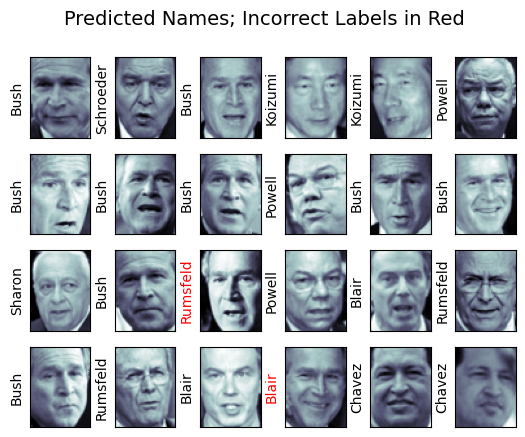

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

#Langkah 6 - Cek Performansi

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

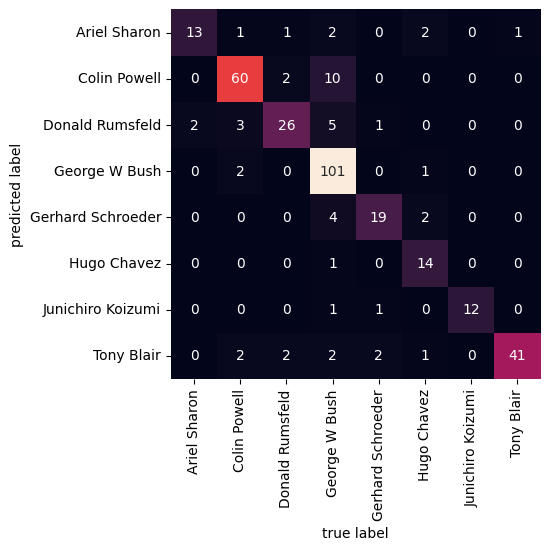

In [ ]:
#Dari tabel tersebut, kita mendapatkan informasi terkait dengan akurasi keseluruhan, presisi, recall, dan f1-score untuk setiap label.

#Selanjutnya, kita dapat menggunakan confusion matrix untuk mengetahui label label yang terklasifikasi  dengan benar dan tidak.

# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#Lab 5
Klasifikasi Citra Siang dan Malam

#Langkah 0 - Import Library

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
#Ekstraksi gambar
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/images/training/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/images/test/"

#Langkah 1 - Load Data dan Visualisasikan

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [ ]:
#Load gambar training
# Load training data
train_img = load_dataset(train_dir)

In [ ]:
#Pengecekan Data
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [117, 145, 193],
         [131, 159, 207],
         [144, 172, 220]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [115, 143, 191],
         [120, 148, 196],
         [124, 152, 200]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [125, 153, 201],
         [123, 151, 199],
         [120, 148, 196]],
 
        ...,
 
        [[ 58,  69,  87],
         [ 59,  70,  88],
         [ 60,  71,  89],
         ...,
         [117, 103,  94],
         [115, 101,  92],
         [113,  99,  90]],
 
        [[ 59,  70,  88],
         [ 59,  70,  88],
         [ 60,  71,  89],
         ...,
         [116, 103,  94],
         [114, 101,  92],
         [112,  99,  90]],
 
        [[ 59,  70,  88],
         [ 60,  71,  89],
         [ 61,  72,  90],
         ...,
         [117, 104,  95],
  

In [ ]:
#Cek ukuran gambar secara acak
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 132
(737, 1024, 3)


In [ ]:
#Tampilkan gambar inspeksi visual
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (889, 1280, 3)
Label	: night


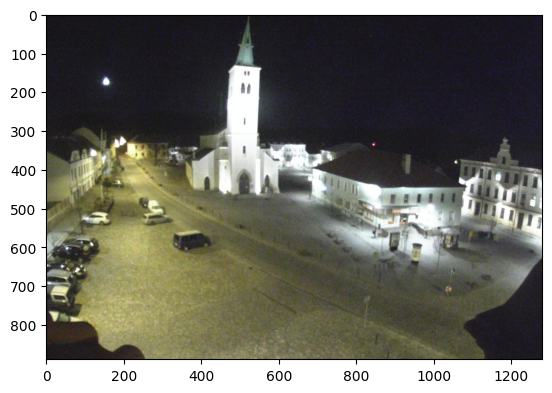

In [ ]:
#Visualisasi gambar acak
random_img_viz(train_img)

#Langkah 3 - Pra Pengolahan Data

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [ ]:
#encoding label
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [ ]:
#Buat Fungsi
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [ ]:
#Pra pengolahan data
train_std_img_list = preprocess(train_img)

In [ ]:
#Pengecekkan ukuran secara acak
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 118
(600, 1100, 3)


#Langkah 4 - Ekstraksi Fitur

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 184
Avg Brighness: 93.7349


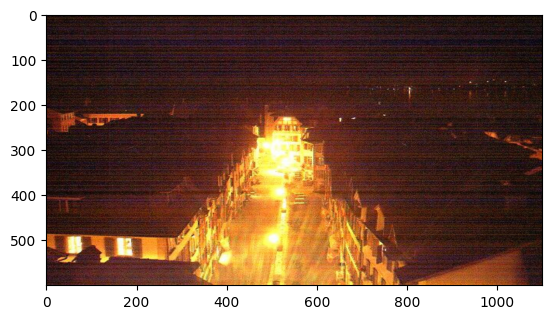

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

#Langkah 5 - Klasifikasi dengan Metode Threshold

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 191
Actual label: 0
Predicted label: 0


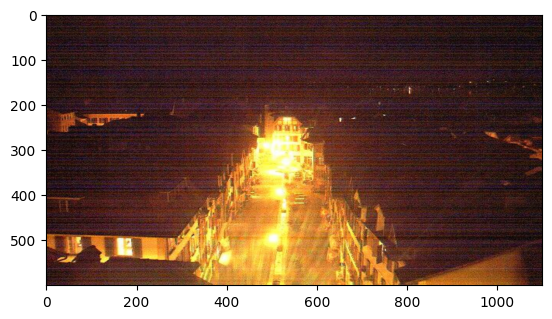

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

#Langkah 6 - Evaluasi Manual

In [ ]:
#Buat Fungsi
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


#Langkah 4 Alternatif - Membuat Feature Vectors.

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,129.237782,1.0
1,116.275882,1.0
2,112.142015,1.0
3,117.857553,1.0
4,113.288367,1.0


In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,161.989627,1.0
1,157.650256,1.0
2,129.345136,1.0
3,191.237441,1.0
4,157.826662,1.0


#Langkah 5 - Buat Model SVM

In [ ]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

#Langkah 6 - Evaluasi

In [ ]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# Tugas
Lakukan analisis data menggunakan Python. Kerjakan per bagian beserta penjelasannya menggunakan bahasa indonesia.

1. Buatlah model SVM dengan menggunakan data "voice.csv" dengan ketentuan:
    a. Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
    - Gunakan model dengan kernel linier.
    - Gunakan model dengan kernel polynomial.
    - Gunakan model dengan kernel RBF.
    b. Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

#Import Library

In [ ]:
import cv2 as cv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#1. Model SVM data voice

In [ ]:
data = pd.read_csv('voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
data['label'] = data['label'].map({'male': 0, 'female': 1})

In [ ]:
X = data.drop(columns=['label'])
y = data['label']

#Define Model

In [ ]:
def evaluate_svm_model(X, y, test_size):
  result = []
  kernels = ['linear', 'poly', 'rbf']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

  for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    result.append({'Split': f'{int((1-test_size)*100)}:{int(test_size*100)}', 'Kernel': kernel, 'Akurasi': accuracy})
  return result

# Split data dengan rasio 70:30 dan 80:20

In [ ]:
result_70_30 = evaluate_svm_model(X, y, test_size=0.3)
result_80_20 = evaluate_svm_model(X, y, test_size=0.2)

In [ ]:
result_df = pd.DataFrame(result_70_30 + result_80_20)
print(result_df)

   Split  Kernel   Akurasi
0  70:30  linear  0.926393
1  70:30    poly  0.490011
2  70:30     rbf  0.662461
3  80:20  linear  0.941640
4  80:20    poly  0.482650
5  80:20     rbf  0.656151


#2.Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/images/training/"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/images/test/"

#Load dataset

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

# Load dataset training dan testing

In [ ]:

train_img = load_dataset(train_dir)
test_img = load_dataset(test_dir)

In [ ]:
print(f"Total data training: {len(train_img)}")
print(f"Total data testing: {len(test_img)}")

Total data training: 240
Total data testing: 160


## Resize + Label Encoding

In [ ]:
def standarized_input(image):
    return cv.resize(image, (256, 256))

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_list = []
    for img, label in img_list:
        std_img = standarized_input(img)
        num_label = label_encoder(label)
        std_list.append((std_img, num_label))
    return std_list

Ukuran gambar: (256, 256, 3)
Label numerik: 1


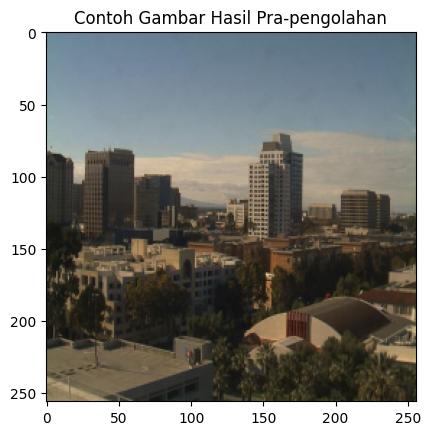

In [ ]:
train_std = preprocess(train_img)
test_std = preprocess(test_img)

rand = np.random.randint(0, len(train_std))
print(f"Ukuran gambar: {train_std[rand][0].shape}")
print(f"Label numerik: {train_std[rand][1]}")
plt.imshow(train_std[rand][0])
plt.title("Contoh Gambar Hasil Pra-pengolahan")
plt.show()

#Ekstraksi fitur histogram

In [ ]:

def extract_histogram_features(img_list):
    features = []
    labels = []
    for img, label in img_list:
        # Flatten histogram dari 3 channel
        hist = cv.calcHist([img], [0, 1, 2], None, [32, 32, 32],
                            [0, 256, 0, 256, 0, 256])
        hist = cv.normalize(hist, hist).flatten()
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

In [ ]:
X_train, y_train = extract_histogram_features(train_std)
X_test, y_test = extract_histogram_features(test_std)

print("Bentuk data training :", X_train.shape)
print("Bentuk data testing  :", X_test.shape)

Bentuk data training : (240, 32768)
Bentuk data testing  : (160, 32768)


## Split data (80:20)

In [ ]:
X_train_split, X_val, y_train_split, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [ ]:
# model SVM kernel RBF + Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 50],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=3, verbose=1)
grid.fit(X_train_split, y_train_split)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 1.0


In [ ]:
# Evaluasi model terbaik
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

print(f"Akurasi pada data test: {acc_test:.4f}")

Akurasi pada data test: 0.9563


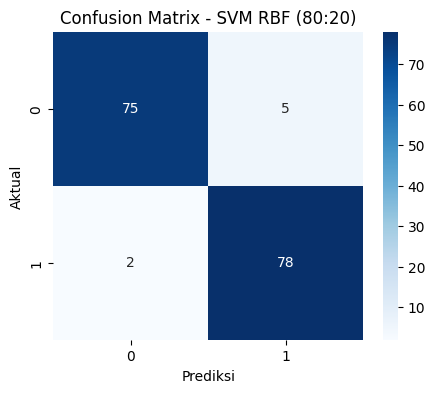


Classification Report:
              precision    recall  f1-score   support

       Night       0.97      0.94      0.96        80
         Day       0.94      0.97      0.96        80

    accuracy                           0.96       160
   macro avg       0.96      0.96      0.96       160
weighted avg       0.96      0.96      0.96       160



In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - SVM RBF (80:20)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Night', 'Day']))